In [ ]:
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. 
There are certain events and holidays which impact sales on each day. There are sales data available for 45
stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock 
some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand
accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent 
holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The
weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part 
of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in
the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different
regions are available.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum()
store_with_max_sales = store_sales.idxmax()
max_sales_value = store_sales.max()
print(f"The store with the maximum sales is Store {store_with_max_sales}")
print(f"The maximum sales value is ${max_sales_value:.2f}")


The store with the maximum sales is Store 20
The maximum sales value is $301397792.46


In [6]:
store_sales_std = data.groupby('Store')['Weekly_Sales'].std()
store_sales_mean = data.groupby('Store')['Weekly_Sales'].mean()
store_with_max_std = store_sales_std.idxmax()
max_std_value = store_sales_std.max()
coefficient_of_variation = store_sales_mean / store_sales_std
print(f"The store with the maximum standard deviation is Store {store_with_max_std}")
print(f"The maximum standard deviation in sales is ${max_std_value:.2f}")
print("Coefficient of mean to standard deviation for each store:")
print(coefficient_of_variation)


The store with the maximum standard deviation is Store 14
The maximum standard deviation in sales is $317569.95
Coefficient of mean to standard deviation for each store:
Store
1      9.970873
2      8.102160
3      8.694034
4      7.868902
5      8.426840
6      7.362531
7      5.068303
8      8.550456
9      7.880502
10     6.284032
11     8.179167
12     7.250300
13     7.546394
14     6.363884
15     5.171059
16     6.053978
17     7.966815
18     6.140790
19     7.536924
20     7.639263
21     5.872253
22     6.378248
23     5.564175
24     8.088169
25     6.255458
26     9.081773
27     7.398888
28     7.281744
29     5.442400
30    19.227797
31    11.091264
32     8.452336
33    10.767931
34     9.239989
35     4.353863
36     6.150859
37    23.761933
38     9.019129
39     6.670767
40     8.101772
41     6.748681
42    11.069866
43    15.599741
44    12.225939
45     6.038183
Name: Weekly_Sales, dtype: float64


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
q2_2012 = data[(data['Date'] >= '2012-04-01') & (data['Date'] <= '2012-06-30')]
q3_2012 = data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')]
q2_2012_sales = q2_2012.groupby('Store')['Weekly_Sales'].sum()
q3_2012_sales = q3_2012.groupby('Store')['Weekly_Sales'].sum()
quarterly_growth_rate = (q3_2012_sales - q2_2012_sales) / q2_2012_sales * 100
stores_with_good_growth = quarterly_growth_rate[quarterly_growth_rate > 0]
if not stores_with_good_growth.empty:
    top_stores = stores_with_good_growth.sort_values(ascending=False).head()
    print("Stores with good quarterly growth rate in Q3'2012:")
    print(top_stores)
else:
    print("No stores with positive quarterly growth rate in Q3'2012.")


No stores with positive quarterly growth rate in Q3'2012.


In [11]:
non_holiday_sales_mean = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
holiday_sales = data[data['Holiday_Flag'] == 1]
holidays_with_higher_sales = holiday_sales[holiday_sales['Weekly_Sales'] > non_holiday_sales_mean]
print("Holidays with higher sales than mean non-holiday sales:")
print(holidays_with_higher_sales[['Date', 'Weekly_Sales']])

Holidays with higher sales than mean non-holiday sales:
           Date  Weekly_Sales
1    2010-12-02    1641957.44
31   2010-10-09    1507460.69
42   2010-11-26    1955624.11
47   2010-12-31    1367320.01
53   2011-11-02    1649614.93
...         ...           ...
5819 2011-12-30    1264014.16
5825 2012-10-02    1238844.56
5855 2012-07-09    1392143.82
6334 2010-11-26    1182500.16
6386 2011-11-25    1170672.94

[220 rows x 2 columns]


In [12]:
holiday_sales = data[data['Holiday_Flag'] == 1]
holiday_total_sales = holiday_sales.groupby('Date')['Weekly_Sales'].sum()
holiday_with_highest_sales = holiday_total_sales.idxmax()
highest_sales_amount = holiday_total_sales.max()
print(f"The holiday with the highest sales is: {holiday_with_highest_sales}")
print(f"The sales amount during that holiday is: ${highest_sales_amount:.2f}")

The holiday with the highest sales is: 2011-11-25 00:00:00
The sales amount during that holiday is: $66593605.26


Text(0.5, 1.0, 'Monthly View of Sales in Units')

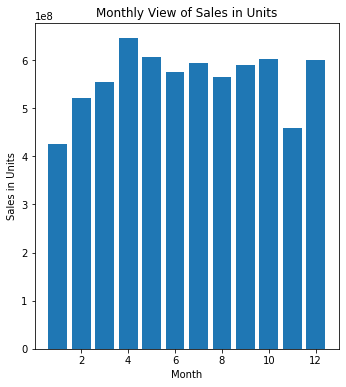

In [18]:
data['Month'] = data['Date'].dt.month
data['Semester'] = (data['Month'] + 2) // 6  # Semester: 1 (Jan to Jun), 2 (Jul to Dec)
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum()
semesterly_sales = data.groupby('Semester')['Weekly_Sales'].sum()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales in Units')
plt.title('Monthly View of Sales in Units')

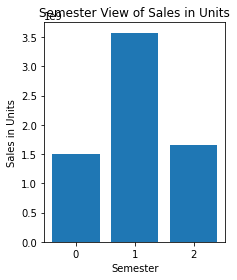

In [16]:
plt.subplot(1, 2, 2)
plt.bar(semesterly_sales.index, semesterly_sales.values)
plt.xlabel('Semester')
plt.ylabel('Sales in Units')
plt.title('Semester View of Sales in Units')
plt.tight_layout()
plt.show()

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
store_1_data = data[data['Store'] == 1].copy()
store_1_data['Date'] = pd.to_datetime(store_1_data['Date'])
store_1_data['Date_ID'] = (store_1_data['Date'] - store_1_data['Date'].min()).dt.days + 1
X = store_1_data[['Date_ID', 'CPI', 'Unemployment', 'Fuel_Price']]
y = store_1_data['Weekly_Sales']
model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(model.intercept_)

Coefficients:
Date_ID             93.547324
CPI              16880.589048
Unemployment    129127.775808
Fuel_Price      -74584.300344
dtype: float64
Intercept:
-2882565.8546081185


In [24]:
data['Date'] = pd.to_datetime(data['Date'])
min_date = data['Date'].min()
data['Days_Since_Min_Date'] = (data['Date'] - min_date).dt.days + 1
print(data)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Days_Since_Min_Date